## 2차 과제

- 주제: 데이터 크롤링을 활용한 뉴스 & 리뷰 데이터 분석
- 데이터: 자유롭게 크롤링
- 사용 라이브러리: selenium, beautifulsoup, etc.

### 1. 뉴스 기사 데이터 크롤링

1.1 원하는 뉴스 기사의 본문을 크롤링하시오.

In [2]:
pip install newspaper3k

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.1/211.1 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.7/97.7 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 40.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13538 sha256=ab834c047e0faad635f8562171e20590067e1df10a44493bc63119ad40668dab
  Stored in directory: /root/.cache/pip/wheels/c8/d6/6c/384f58df48c00b9a31d638005143b5b3ac62c3d25fb1447f23
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3340 sha256=4240928cf55bff31d3e4ed0f96b70bb928fad0b076e17a87781f82a229775de7
  Stored in directory: /root/.cache/pip/wheels/97/02/e7/a1ff1760e12bdbaab0ac824fae5c1bc

In [3]:
from newspaper import Article # 패키지 불러오기

link = 'https://view.asiae.co.kr/article/2023032217473512545?utm_source=newsstand.naver.com&utm_medium=referral&utm_campaign=top6' # 뉴스 기사 URL
article = Article(link, language = 'ko') # URL과 언어를 입력

In [5]:
article.download()
article.parse()
title = article.title
text = article.text
date = article.publish_date

In [6]:
print(title)

'반도체' 빠지니 드러난 韓기업 민낯…1분기 실적 '어닝 쇼크' 수준


In [7]:
print(text)

삼성전자 반도체 부문-하이닉스, 3조~4조대 적자 전망

매출 상위 10위권 중 6개 기업 영업이익 큰 폭 감소

고강도 긴축과 경기 침체 등으로 올해 1분기 국내 주요 상장사가 '어닝 쇼크'를 기록할 전망이다. 특히 삼성전자, SK하이닉스 등 한국 경제를 이끄는 간판 대기업의 영업이익은 '빅쇼크' 수준의 부진에 빠졌다. 2분기 실적 전망도 밝지 않다. 미국의 금리 인상 행진이 막바지에 다다르긴 했지만, 실리콘밸리은행(SVB)·크레디스위스(CS) 사태에 따른 금융권발 불안과 여전히 높은 물가수준 등으로 경기 침체 우려가 쉽사리 가시지 않을 것으로 보인다.

1분기 영업이익 26조로 지난해 같은 기간의 절반

24일 금융정보업체 에프앤가이드에 따르면 실적 추정 기관 3곳 이상인 코스피·코스닥 상장사 199곳의 올해 1분기 영업이익(이하 전망치) 총액은 26조1033억원으로 집계됐다. 지난해 1분기(50조6590억원)의 반타작 수준이다. 실적 전망치가 취합된 199개 상장사 중 약 45%에 이르는 89개 기업의 영업이익이 줄어들 전망이다. 2분기 실적은 더욱 나쁠 것으로 보인다. 2분기 영업이익 전망치 총액은 21조3125억원에 불과하다. 지난해 같은 기간의 실적(44조4322억원)의 절반에도 미치지 못하는 수치다.

삼성전자 서초사옥 전경. 사진=김현민 기자 kimhyun81@ AD 원본보기 아이콘

상장사 영업이익 총액이 이처럼 급감한 데는 국내 매출 순위 최상위권에 속하는 주요 대기업의 부진 영향이 컸다. 상장사 199곳 중 1분기 매출 상위 10위권에서 6개 기업의 영업이익이 지난해 같은 기간 대비 큰 폭 감소할 전망이다. 삼성전자(-88.1%)·POSCO홀딩스(-66.6%)·SK이노베이션(-63.5%)·LG전자(-45.4%)·LG화학(-40.9%)·HD현대(-24.2%)가 큰 낙폭을 보였다. 적자폭을 줄이긴 했지만 한국전력은 여전히 5조원대 손실을 기록할 것으로 보인다.

삼성전자 1분기 적자전환 분석도 나와

지난해 1분기 14조원대였던 삼성전자의 영업

1.2 크롤링한 본문을 단어 단위로 나누고 각 단어가 나온 횟수와 함께 dataframe 형식으로 변환하시오.

In [10]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter

# Download NLTK resources if not already downloaded
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [11]:
# 본문 텍스트 토큰화
words = word_tokenize(text.lower())

In [12]:
# 각 단어 나온 횟수
word_freq = Counter(words)

# 각 단어가 나온 횟수와 함께 데이터프레임 형식으로 변환
word_freq_df = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency'])

# 횟수 빈도를 기준으로 내림차순하여 데이터프레임 형성
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

In [13]:
# 인덱스번호 다시 새로 설정
word_freq_df = word_freq_df.reset_index(drop=True)

# Display the DataFrame
print(word_freq_df)

          Word  Frequency
0            .         62
1            )         23
2            (         23
3          것으로         19
4          1분기         18
..         ...        ...
602    1000억원일          1
603  이베스트투자증권은          1
604     3200억원          1
605      신영증권은          1
606        대규모          1

[607 rows x 2 columns]


In [25]:
word_freq_df.head(20)

,Word,Frequency
0,.,62
1,),23
2,(,23
3,것으로,19
4,1분기,18
5,%,15
6,",",12
7,반도체,11
8,지난해,11
9,``,10


1.3 불용어를 제거하시오.

In [16]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [39]:
# 한국어 불용어 리스트
korean_stopwords = ['.', '(', ')', '%', '"', "'", ",","``", "''", "%",
    '은', '는', '이', '가', '을', '를', '에', '에게', '에게서', '에게로', '에게서부터', '에게로부터', '에게로서', '의', '와', '과',
    '나', '다', '들', '으로', '로', '께', '뿐', '만', '만큼', '처럼', '같이', '때', '고', '하고', '하면', '하며', '하니',
    '한테', '한테서', '한테로', '한테서부터', '한테로부터', '한테로서', '하지만', '그리고', '그러나', '그런데', '하지만', '이런',
    '저런', '그런', '어떤', '무슨', '어느', '얼마', '몇', '어디', '언제', '무엇', '뭔가', '아무', '모두', '다른', '여기',
    '저기', '그곳', '어디', '어디서', '어디로', '어디서부터', '어디로부터', '어디로서', '무슨', '무슨일', '어떤', '어떤것',
    '어떤것들', '어떻게', '어떻게든', '어느', '어느날', '어느새', '언제', '언제나', '어디', '어디서', '어디로', '어디에서', '어디까지',
    '어디부터', '얼마', '얼마나', '얼마만큼', '몇', '몇개', '몇개나', '몇명', '몇바퀴', '몇시', '몇일', '몇분', '몇월', '몇시간',
    '몇년', '몇달', '몇개월', '몇주', '몇시간', '몇초', '몇몇', '무슨', '무엇', '무엇이', '무엇을', '무엇인가', '무엇인지',
    '무엇인지도', '어느', '어느날', '어느새', '어느덧', '어느곳', '어느순간', '어느정도', '어느덧', '어느새', '어느순간',
    '어느날', '어느해', '어느달', '어느날', '어느때', '어느시간', '어느시절', '어느월', '어느해', '어느밤', '어느날밤',
    '어느가을', '어느겨울', '어느봄', '어느여름', '어느말', '어느길', '어느집', '어느냄새', '어느소리', '어느모습',
    '어느아침', '어느날', '어느순간', '어느시절', '어느새', '어느덧'
]


In [40]:
word_tokens = word_tokenize(text.lower())

In [41]:
# 불용어를 제거한 본문 텍스트

result = []
for w in word_tokens:
    if w not in korean_stopwords:
        result.append(w)
print(result)

['삼성전자', '반도체', '부문-하이닉스', '3조~4조대', '적자', '전망', '매출', '상위', '10위권', '중', '6개', '기업', '영업이익', '큰', '폭', '감소', '고강도', '긴축과', '경기', '침체', '등으로', '올해', '1분기', '국내', '주요', '상장사가', "'어닝", '쇼크', '기록할', '전망이다', '특히', '삼성전자', 'sk하이닉스', '등', '한국', '경제를', '이끄는', '간판', '대기업의', '영업이익은', "'빅쇼크", '수준의', '부진에', '빠졌다', '2분기', '실적', '전망도', '밝지', '않다', '미국의', '금리', '인상', '행진이', '막바지에', '다다르긴', '했지만', '실리콘밸리은행', 'svb', '·크레디스위스', 'cs', '사태에', '따른', '금융권발', '불안과', '여전히', '높은', '물가수준', '등으로', '경기', '침체', '우려가', '쉽사리', '가시지', '않을', '것으로', '보인다', '1분기', '영업이익', '26조로', '지난해', '같은', '기간의', '절반', '24일', '금융정보업체', '에프앤가이드에', '따르면', '실적', '추정', '기관', '3곳', '이상인', '코스피·코스닥', '상장사', '199곳의', '올해', '1분기', '영업이익', '이하', '전망치', '총액은', '26조1033억원으로', '집계됐다', '지난해', '1분기', '50조6590억원', '반타작', '수준이다', '실적', '전망치가', '취합된', '199개', '상장사', '중', '약', '45', '이르는', '89개', '기업의', '영업이익이', '줄어들', '전망이다', '2분기', '실적은', '더욱', '나쁠', '것으로', '보인다', '2분기', '영업이익', '전망치', '총액은', '21조3125억원에', '불과하다', '지난해', '같은', '기간의', '실적', '44조4322

In [47]:
# 각 단어 나온 횟수
word_freq = Counter(result)

# 각 단어가 나온 횟수와 함께 데이터프레임 형식으로 변환
word_freq_df = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency'])

# 횟수 빈도를 기준으로 내림차순하여 데이터프레임 형성
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

In [49]:
word_freq_df

,Word,Frequency
70,것으로,19
22,1분기,18
73,지난해,11
1,반도체,11
0,삼성전자,9
...,...,...
220,3200억원,1
219,신영증권은,1
218,7680억원,1
216,리포트,1


1.4 처리한 데이터를 워드아트로 변환해 어떤 단어가 가장 많이 나왔는지 확인하시오(폰트, 색 등 자유).

In [53]:
pip install wordcloud

In [54]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [57]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (49.6 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121752 files and direc

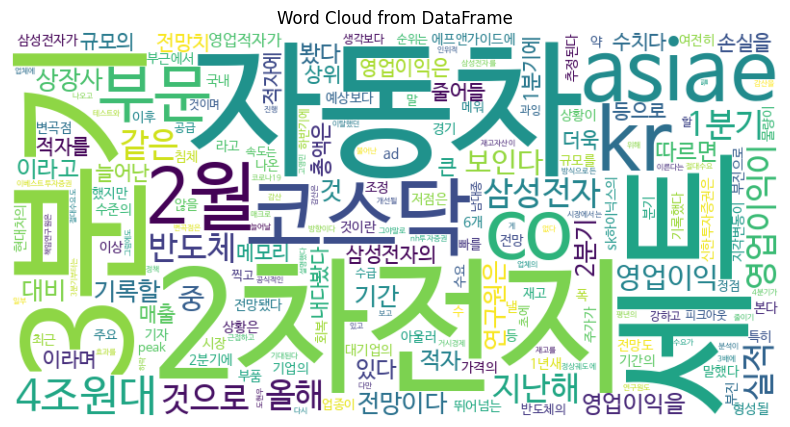

In [58]:
# Combine all text into a single string
text_combined = ' '.join(word_freq_df['Word'])

# Generate the word cloud
wordcloud = WordCloud(font_path='NanumBarunGothic',width=800, height=400, background_color='white').generate(text_combined)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis numbers and ticks
plt.title('Word Cloud from DataFrame')
plt.show()

### 2. 플레이스토어 리뷰 데이터 크롤링(동적 크롤링)

2.1 100개 이상의 리뷰를 가진 앱에 있는 댓글 리뷰를 크롤링하시오.

In [79]:
pip install google-play-scraper

In [60]:
from google_play_scraper import app, reviews

In [93]:
from google_play_scraper import Sort, reviews_all, reviews
from numpy import mean

result = reviews_all(
    'com.miHoYo.GenshinImpact',
    lang='en', # defaults to 'en'
    country='us', # defaults to 'us'
    sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
)

In [ ]:
result

In [96]:
scores = [item['score'] for item in result]

In [ ]:
scores

In [84]:
print(len(scores))
print(mean(scores))

398
3.5653266331658293


In [100]:
reviews_df[reviews_df['score']==3]

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
9,c39e526b-7dc7-47e7-a7ab-5285d179aa5d,Jerilyn Sinclair,https://play-lh.googleusercontent.com/a-/ALV-U...,"Love this game, but I initially started playin...",3,0,4.5.0_21307647_21321795,2024-03-16 05:40:52,None,NaT,4.5.0_21307647_21321795
12,3af6af54-f7cd-4d47-9c8a-a5cf9ac4456f,Chackthikone Phonepaseuth,https://play-lh.googleusercontent.com/a-/ALV-U...,Great game but we really need a skip button to...,3,1,4.5.0_21307647_21321795,2024-03-16 05:32:55,None,NaT,4.5.0_21307647_21321795
13,3f67f794-eeb9-47e6-8fbd-aaeb92600681,ardi wiguna,https://play-lh.googleusercontent.com/a-/ALV-U...,will give you 5 stars when android controller ...,3,2,4.5.0_21307647_21321795,2024-03-16 05:30:27,None,NaT,4.5.0_21307647_21321795
14,009bd6a3-1ecf-424c-b792-b3b51ff58017,Jessen Jie,https://play-lh.googleusercontent.com/a-/ALV-U...,Good game overall. But im so disappointed abou...,3,0,None,2024-03-16 05:29:34,None,NaT,None
15,75da427b-1408-4597-af81-21c6d3cd1ce9,zura Mohd,https://play-lh.googleusercontent.com/a/ACg8oc...,Borigm,3,0,None,2024-03-16 05:26:54,None,NaT,None
25,c2b6eda6-4f71-46a6-a352-991e506de82f,Khloe,https://play-lh.googleusercontent.com/a/ACg8oc...,It would not let me download it or open it 😭,3,0,None,2024-03-16 03:53:57,None,NaT,None
26,fba2a907-c9f5-4d56-a69c-3f958986a6d3,MOUSTAFA Amhaz,https://play-lh.googleusercontent.com/a/ACg8oc...,I'm having a problem logging into my account. ...,3,0,None,2024-03-16 03:51:38,None,NaT,None
28,c59f83c1-c4aa-4b4a-b1c2-ca1b567ba12e,zafar zokirov,https://play-lh.googleusercontent.com/a/ACg8oc...,Masterpiece,3,0,4.0.0_16983586_17100363,2024-03-16 03:50:56,None,NaT,4.0.0_16983586_17100363
37,060744ab-3640-494f-8cfc-96cd6df818d6,Aqiila Tsany Andarra,https://play-lh.googleusercontent.com/a-/ALV-U...,I GOT KEQING IN PITY 79 ARE YOU INSANE HOYOVER...,3,0,4.5.0_21307647_21321795,2024-03-16 03:15:40,None,NaT,4.5.0_21307647_21321795
39,6ac5900e-df4a-4fbe-bcd9-e4d5a95d964b,Earle Mckenzie F. Galvan (Ken),https://play-lh.googleusercontent.com/a-/ALV-U...,"My friend's account got hacked, and he blamed ...",3,1,4.5.0_21307647_21321795,2024-03-16 03:06:55,None,NaT,4.5.0_21307647_21321795


2.2 크롤링한 데이터를 dataframe 형태로 변환하시오(날짜, 별점, 리뷰 유저 등).

In [104]:
# Create a DataFrame from the extracted information
reviews_df = pd.DataFrame(result)

2.3 긍정 리뷰와 부정 리뷰를 나누시오(기준은 자유).

In [103]:
# score값이 1,2이면 negative, 3이면 normal, 4,5이면 positive로 분류했다.
def categorize_score(score):
    if score in [1, 2]:
        return 'Negative'
    elif score == 3:
        return 'Normal'
    elif score in [4, 5]:
        return 'Positive'
    else:
        return 'Unknown'

# Apply the categorize_score function to create a new column 'Sentiment'
reviews_df['Sentiment'] = reviews_df['score'].apply(categorize_score)

reviews_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,Sentiment
0,f8ea413c-3c5e-4abf-9419-7670ae6dc43a,Azyria Etherylia,https://play-lh.googleusercontent.com/a/ACg8oc...,Hehe~ so far so good.,5,0,4.5.0_21307647_21321795,2024-03-16 06:26:28,None,NaT,4.5.0_21307647_21321795,Positive
1,3e189d98-4e92-4ba2-ae15-6accbff0de68,Imaiia,https://play-lh.googleusercontent.com/a-/ALV-U...,"I absolutely love this game the quality, gamep...",4,9,4.5.0_21307647_21321795,2024-03-16 06:26:25,None,NaT,4.5.0_21307647_21321795,Positive
2,bdd684af-bbbb-4129-87d6-dcc808b4d1ee,ABHISHEK KUMAR,https://play-lh.googleusercontent.com/a/ACg8oc...,Frustrated by long chats and subtitles...shoul...,1,0,4.5.0_21307647_21321795,2024-03-16 06:26:10,None,NaT,4.5.0_21307647_21321795,Negative
3,a69403cc-9214-475d-a248-7e575fc1d008,Halo Halo,https://play-lh.googleusercontent.com/a/ACg8oc...,Nice game.,5,0,4.5.0_21307647_21321795,2024-03-16 06:24:46,None,NaT,4.5.0_21307647_21321795,Positive
4,b8fe4840-0168-4661-9745-363f9c975a19,Ashwin Rajan,https://play-lh.googleusercontent.com/a-/ALV-U...,"This game doesn't care about its player base, ...",1,0,4.5.0_21307647_21321795,2024-03-16 06:20:10,None,NaT,4.5.0_21307647_21321795,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...
194,9c4e276f-bfd0-408f-92d8-da6ac441d78c,gshunliu,https://play-lh.googleusercontent.com/a-/ALV-U...,Its so good,5,0,4.5.0_21307647_21321795,2024-03-15 08:01:10,None,NaT,4.5.0_21307647_21321795,Positive
195,b8d1d855-6dbb-45b6-9f53-00f2695cc310,David Souza,https://play-lh.googleusercontent.com/a-/ALV-U...,Genshin would be fun if: - The text dialog was...,2,0,None,2024-03-15 07:55:17,None,NaT,None,Negative
196,8f7853f4-ec3e-4d4b-84b9-f140ec1d80fb,Raian Ahasan araf,https://play-lh.googleusercontent.com/a/ACg8oc...,This game is very good but takes a lots of spa...,2,0,None,2024-03-15 07:54:43,None,NaT,None,Negative
197,59479007-dc8b-400b-b965-729b87ff3e21,nazvxmii,https://play-lh.googleusercontent.com/a/ACg8oc...,LET ME WIN 50/50 ON FURINA'S BANNER ‼️‼️‼️,5,2,None,2024-03-15 07:33:21,None,NaT,None,Positive


### 3. 자유 분석

3.1 위에서 크롤링한 데이터들을 활용해 자유롭게 인사이트를 도출하시오.

내가 크롤링한 기사는 작년 반도체 업계의 불황이 주제였다.

 따라서 불용어를 제거하고 가장 비번히 등장한 단어는 삼성전자, 코스닥, 반도체, 손실, 영업이익 등과 같은 단어들이었다.
 2분기와 3분기와 같은 용어들도 나왔는데 그 이유는 이익 실적을 논할 때 분기 별로 나눠서 실적을 측정하기 때문이다.

그리고 2차 전지와 자동차는 의아스러울 수 있는데 알고 보니 기사에서 반도체 산업은 부진인 반면 2차 전지와 자동차 산업은 호황이라고 언급되어 있었다.

In [118]:
import matplotlib.pyplot as plt

In [116]:
score_counts = reviews_df['score'].value_counts()

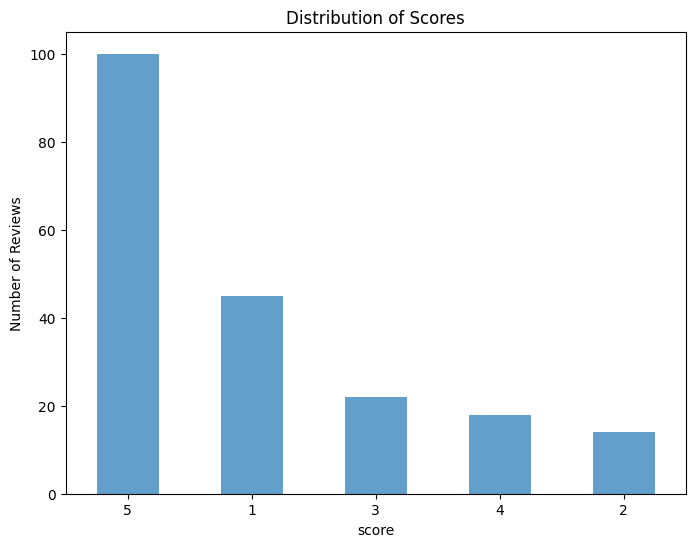

In [117]:
# Create a bar graph
plt.figure(figsize=(8, 6))
score_counts.plot(kind='bar', alpha=0.7)
plt.xlabel('score')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Scores')
plt.xticks(rotation=0)
plt.show()

score를 기준으로 막대그래프로 시각화 해 본 결과 5점이 가장 많았고 그 다음이 1점이었다. 그리고 사람들이 2점이나 4점을 주는 경우의 거의 없었다. 따라서 좀 더 명확하게 사람들의 피드백을 받고 싶다면 좋다, 보통이다, 나쁘다 이렇게 3가지만 가지고 리뷰를 평가하는 것도 괜찮을 것 같다.